# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [4]:
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109245, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [01:33<00:00, 1173.26it/s]


In [19]:
project_data.drop(['essay'],axis = 1,inplace = True)
project_data['essay'] = preprocessed_essays

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
preprocessed_titles = []

for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:03<00:00, 30844.87it/s]


In [21]:
project_data.drop(['project_title'],axis = 1,inplace = True)
project_data['project_title'] = preprocessed_titles

In [22]:
project_grade_category = []

for i in tqdm(project_data["project_grade_category"].values) :
    sent = decontracted(i)
    sent = sent.replace('Grades','')
    sent = sent.replace(' ','')
    sent = sent.replace('-','_')
    
    project_grade_category.append(sent.lower().strip())
    
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data['project_grade_category'] = project_grade_category

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:01<00:00, 81061.61it/s]


In [23]:
teacher_prefix = []

for i in tqdm(project_data["teacher_prefix"].values) :
    sent = decontracted(i)
    sent = sent.replace('.','')
    
    
    teacher_prefix.append(sent.lower().strip())
    
project_data.drop(['teacher_prefix'], axis=1, inplace=True)
project_data['teacher_prefix'] = teacher_prefix

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 109245/109245 [00:01<00:00, 84690.32it/s]


In [24]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'],axis = 1,inplace = True)

X = project_data

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'project_title',
       'project_grade_category', 'teacher_prefix'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [27]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\MAHE\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [28]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot_train = vectorizer.fit_transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.fit_transform(X_test['clean_categories'].values)


print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",categories_one_hot_test.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig  (76471, 9)
Shape of test matrix after one hot encodig  (32774, 9)


In [29]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot_train = vectorizer.fit_transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.fit_transform(X_test['clean_subcategories'].values)


print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",sub_categories_one_hot_test.shape)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig  (76471, 30)
Shape of test matrix after one hot encodig  (32774, 30)


In [30]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
my_counter = Counter()
for word in X_train['school_state'].values:
    my_counter.update(word.split())
    
for word in X_test['school_state'].values:
    my_counter.update(word.split())
    

    
school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_school_state_dict.keys()), lowercase = False, binary = True)
school_state_one_hot_train = vectorizer.fit_transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer.fit_transform(X_test['school_state'].values)

print(vectorizer.get_feature_names())
print("Shape of train matrix after one hot encodig ",school_state_one_hot_train.shape)
print("Shape of test matrix after one hot encodig ",school_state_one_hot_test.shape)


['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of train matrix after one hot encodig  (76471, 51)
Shape of test matrix after one hot encodig  (32774, 51)


In [31]:
my_counter = Counter()
for word in X_train['teacher_prefix'].values:
    word=str(word)
    my_counter.update(word.split())
    
for word in X_test['teacher_prefix'].values:
    word=str(word)
    my_counter.update(word.split())
    


teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key = lambda kv:kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_teacher_prefix_dict.keys()), lowercase = False, binary = True)
teacher_prefix_one_hot_train = vectorizer.fit_transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer.fit_transform(X_test['teacher_prefix'].values.astype('U'))


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)


['dr', 'teacher', 'mr', 'ms', 'mrs']
Shape of matrix after one hot encodig  (76471, 5)
Shape of matrix after one hot encodig  (32774, 5)


In [32]:
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    
    my_counter.update(word.split())

for word in X_test['project_grade_category'].values:
    
    my_counter.update(word.split())
    



grade_cat_dict = dict(my_counter)
sorted_grade_cat_dict = dict(sorted(grade_cat_dict.items(), key = lambda kv:kv[1]))

vectorizer = CountVectorizer(vocabulary = list(sorted_grade_cat_dict.keys()), lowercase = False, binary = True)
grade_cat_one_hot_train = vectorizer.fit_transform(X_train['project_grade_category'])
grade_cat_one_hot_test = vectorizer.fit_transform(X_test['project_grade_category'])

print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",grade_cat_one_hot_train.shape)
print("Shape of matrix after one hot encodig ",grade_cat_one_hot_test.shape)


['9_12', '6_8', '3_5', 'prek_2']
Shape of matrix after one hot encodig  (76471, 4)
Shape of matrix after one hot encodig  (32774, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [33]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10, max_features = 5000)
vectorizer.fit(X_train['essay'])
text_bow_train = vectorizer.transform(X_train['essay'])
text_bow_test = vectorizer.transform(X_test['essay'])
print("Shape of matrix after one hot encodig ",text_bow_train.shape)

Shape of matrix after one hot encodig  (76471, 5000)


In [34]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df  =10)
vectorizer.fit(X_train['project_title'])
title_bow_train = vectorizer.transform(X_train['project_title'])
title_bow_test = vectorizer.transform(X_test['project_title'])

print(title_bow_train.shape)


(76471, 2712)


#### 1.5.2.2 TFIDF vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features = 5000)
vectorizer.fit(X_train['essay'])
text_tfidf_train = vectorizer.transform(X_train['essay'])
text_tfidf_test = vectorizer.transform(X_test['essay'])

print("Shape of matrix after one hot encodig ",text_tfidf_train.shape)
print("Shape of matrix after one hot encodig ",text_tfidf_test.shape)

Shape of matrix after one hot encodig  (76471, 5000)
Shape of matrix after one hot encodig  (32774, 5000)


In [36]:
vectorizer = TfidfVectorizer( min_df=10,max_features = 5000)
vectorizer.fit(X_train['project_title'])
title_tfidf_train = vectorizer.transform(X_train['project_title'])
title_tfidf_test = vectorizer.transform(X_test['project_title'])

print("Shape of matrix after one hot encodig ",title_tfidf_train.shape)
print(title_tfidf_test.shape)

Shape of matrix after one hot encodig  (76471, 2712)
(32774, 2712)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [37]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [38]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [39]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []
avg_w2v_vectors_test = []# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 76471/76471 [00:31<00:00, 2410.67it/s]


76471
300


In [40]:
avg_w2v_vectors_test = []
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:14<00:00, 2235.62it/s]


32774
300


In [41]:
avg_w2v_proj_train = []
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_train.append(vector)

print(len(avg_w2v_proj_train))
print(len(avg_w2v_proj_train[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 76471/76471 [00:01<00:00, 49576.36it/s]


76471
300


In [42]:
avg_w2v_proj_test = []
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_proj_test.append(vector)

print(len(avg_w2v_proj_test))
print(len(avg_w2v_proj_test[0]))


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:00<00:00, 48519.70it/s]


32774
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [43]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [44]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 76471/76471 [04:13<00:00, 301.26it/s]


76471
300


In [45]:
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [01:48<00:00, 301.05it/s]


32774
300


In [46]:
# Similarly you can vectorize for title also
tfidf_w2v_proj_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_train.append(vector)

print(len(tfidf_w2v_proj_train))
print(len(tfidf_w2v_proj_train[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 76471/76471 [00:03<00:00, 22528.49it/s]


76471
300


In [47]:
tfidf_w2v_proj_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_proj_test.append(vector)

print(len(tfidf_w2v_proj_test))
print(len(tfidf_w2v_proj_test[0]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32774/32774 [00:01<00:00, 21322.08it/s]


32774
300


### 1.5.3 Vectorizing Numerical features

In [48]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test =  pd.merge(X_test, price_data, on='id', how='left')

In [49]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)


normalizer.fit(X_train['price'].values.reshape(1,-1))
X_train_price_standard = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_standard = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_standard = X_train_price_standard.reshape(-1,1)
X_test_price_standard =X_test_price_standard.reshape(-1,1)

# Now standardize the data with above maen and variance.
print(X_train_price_standard.shape,Y_train.shape)
print(X_test_price_standard.shape,Y_test.shape)

(76471, 1) (76471,)
(32774, 1) (32774,)


In [50]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_project_standard = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_project_standard = X_train_project_standard.reshape(-1,1)
X_test_project_standard = X_test_project_standard.reshape(-1,1)

print(X_train_project_standard.shape,Y_train.shape)
print(X_test_project_standard.shape,Y_test.shape)


(76471, 1) (76471,)
(32774, 1) (32774,)


In [51]:
normalizer = Normalizer()

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

X_train_quantity = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
X_test_quantity = normalizer.transform(X_test['quantity'].values.reshape(1,-1))


X_train_quantity = X_train_quantity.reshape(-1,1)
X_test_quantity = X_test_quantity.reshape(-1,1)


print(X_train_quantity.shape,Y_train.shape)
print(X_test_quantity.shape,Y_test.shape)

(76471, 1) (76471,)
(32774, 1) (32774,)


In [52]:
no_of_word_essay_train = []
no_of_word_essay_test= []
no_of_word_title_train = []
no_of_word_title_test = []


In [53]:
for i in X_train['essay']:
    n = len(i.split())
    no_of_word_essay_train.append(n)
    
for i in X_test['essay']:
    n = len(i.split())
    no_of_word_essay_test.append(n)
    

    
for i in X_train['project_title']:
    n = len(i.split())
    no_of_word_title_train.append(n)
    
for i in X_test['project_title']:
    n = len(i.split())
    no_of_word_title_test.append(n)
    

    
    

In [54]:
import numpy as np
no_of_word_essay_train = np.asarray(no_of_word_essay_train,dtype=np.float32)
no_of_word_essay_test = np.asarray(no_of_word_essay_test,dtype=np.float32)

In [55]:
normlizer = Normalizer()
normalizer.fit(no_of_word_essay_train.reshape(1,-1))

X_train_word_essay = normalizer.transform(no_of_word_essay_train.reshape(1,-1))
X_test_word_essay = normalizer.transform(no_of_word_essay_test.reshape(1,-1))

X_train_word_essay = X_train_word_essay.reshape(-1,1)
X_test_word_essay = X_test_word_essay.reshape(-1,1)

print(X_train_word_essay.shape,Y_train.shape)
print(X_test_word_essay.shape,Y_test.shape)

(76471, 1) (76471,)
(32774, 1) (32774,)


In [56]:
no_of_word_title_train = np.asarray(no_of_word_title_train,dtype=np.float32)
no_of_word_title_test = np.asarray(no_of_word_title_test,dtype=np.float32)

In [57]:
normlizer = Normalizer()
normalizer.fit(no_of_word_title_train.reshape(1,-1))

X_train_word_title = normalizer.transform(no_of_word_title_train.reshape(1,-1))
X_test_word_title = normalizer.transform(no_of_word_title_test.reshape(1,-1))

X_train_word_title = X_train_word_title.reshape(-1,1)
X_test_word_title = X_test_word_title.reshape(-1,1)

print(X_train_word_essay.shape,Y_train.shape)
print(X_test_word_essay.shape,Y_test.shape)

(76471, 1) (76471,)
(32774, 1) (32774,)


In [58]:
neg_train = []
neg_test = []
neu_train = []
neu_test = []
pos_train = []
pos_test = []
compound_train = []
compound_test = []

In [59]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MAHE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\MAHE\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



In [60]:
for i in X_train['essay']:
    neg = sia.polarity_scores(i)['neg']
    neu = sia.polarity_scores(i)['neu']
    pos = sia.polarity_scores(i)['pos']
    com = sia.polarity_scores(i)['compound']
    neg_train.append(neg)
    neu_train.append(neu)
    pos_train.append(pos)
    compound_train.append(com)

In [61]:
for i in X_test['essay']:
    neg = sia.polarity_scores(i)['neg']
    neu = sia.polarity_scores(i)['neu']
    pos = sia.polarity_scores(i)['pos']
    com = sia.polarity_scores(i)['compound']
    neg_test.append(neg)
    neu_test.append(neu)
    pos_test.append(pos)
    compound_test.append(com)

In [62]:
neg_train = np.asarray(neg_train,dtype = np.float32)
neg_test = np.asarray(neg_test,dtype = np.float32)
neu_train = np.asarray(neu_train,dtype = np.float32)
neu_test = np.asarray(neu_test,dtype = np.float32)
pos_train = np.asarray(pos_train,dtype = np.float32)
pos_test = np.asarray(pos_test,dtype = np.float32)
compound_train = np.asarray(compound_train,dtype = np.float32)
compound_test = np.asarray(compound_test,dtype = np.float32)


In [63]:
normalizer = Normalizer()
normalizer.fit(pos_train.reshape(1,-1))

X_train_pos = normalizer.transform(pos_train.reshape(1,-1))
X_test_pos = normalizer.transform(pos_test.reshape(1,-1))


X_train_pos =X_train_pos.reshape(-1,1)
X_test_pos = X_test_pos.reshape(-1,1)


In [64]:
normalizer = Normalizer()
normalizer.fit(neg_train.reshape(1,-1))

X_train_neg = normalizer.transform(neg_train.reshape(1,-1))
X_test_neg = normalizer.transform(neg_test.reshape(1,-1))

X_train_neg = X_train_neg.reshape(-1,1)
X_test_neg = X_test_neg.reshape(-1,1)


In [65]:
normalizer = Normalizer()
normalizer.fit(neu_train.reshape(1,-1))

X_train_neu = normalizer.transform(neu_train.reshape(1,-1))
X_test_neu = normalizer.transform(neu_test.reshape(1,-1))

X_train_neu = X_train_neu.reshape(-1,1)
X_test_neu = X_test_neu .reshape(-1,1)



In [66]:
normalizer = Normalizer()
normalizer.fit(compound_train.reshape(1,-1))

X_train_com = normalizer.transform(compound_train.reshape(1,-1))
X_test_com = normalizer.transform(compound_test.reshape(1,-1))

X_train_com = X_train_com.reshape(-1,1)
X_test_com = X_test_com.reshape(-1,1)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [67]:
from scipy.sparse import hstack
X_train_final_set_one = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,text_bow_train,title_bow_train,X_train_price_standard,X_train_project_standard))
Xtrain1 = X_train_final_set_one.tocsr()
X_test_final_set_one = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,text_bow_test,title_bow_test,X_test_price_standard,X_test_project_standard))
Xtest1 = X_test_final_set_one.tocsr()

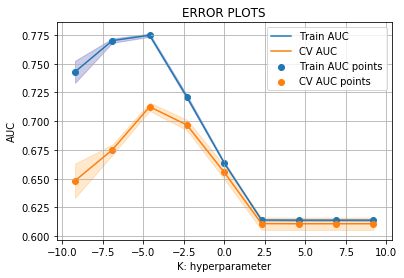

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import math
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight = 'balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain1, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

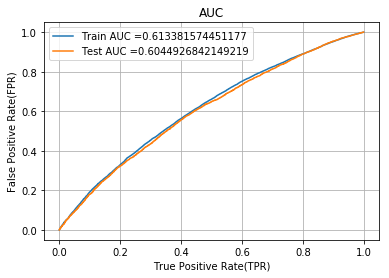

In [69]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.svm import SVC


neigh = SGDClassifier(loss = 'hinge', penalty= 'l2',alpha = 10**2,class_weight='balanced')
neigh.fit(Xtrain1, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(Xtrain1)

y_test_pred = neigh.decision_function(Xtest1)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [70]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.33917353479284323 for threshold 0.029
[[ 6779  4800]
 [27298 37594]]
the maximum value of tpr*(1-fpr) 0.33917353479284323 for threshold 0.029
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3360143911444274 for threshold 0.037
[[ 4056   907]
 [19435  8376]]
the maximum value of tpr*(1-fpr) 0.3360143911444274 for threshold 0.037


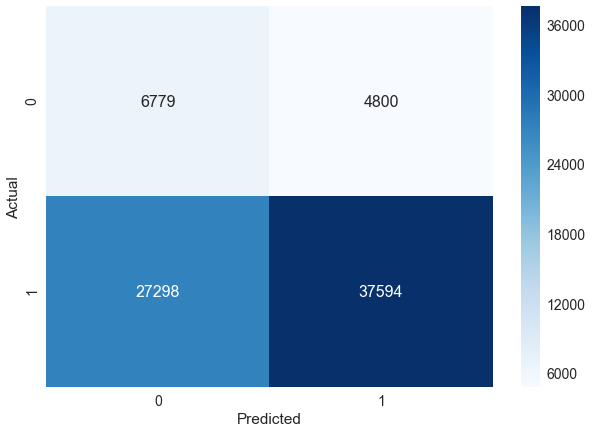

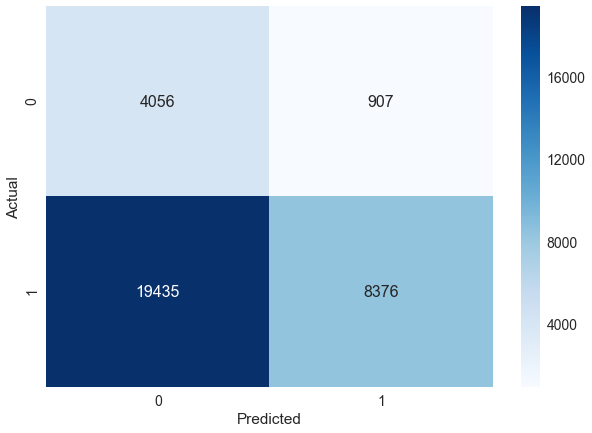

In [71]:
print("="*100)
import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

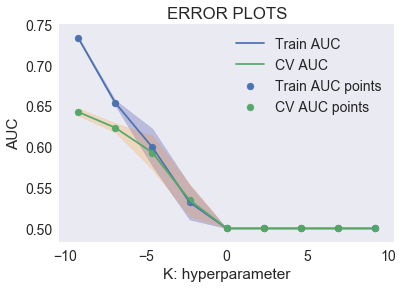

In [72]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}

for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',class_weight = 'balanced')

clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain1, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

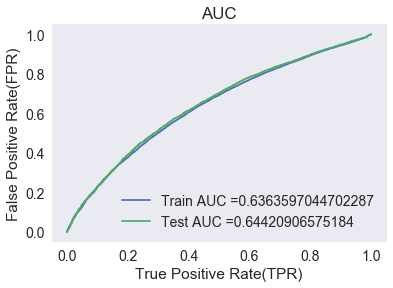

In [73]:
neigh = SGDClassifier(loss = 'hinge', penalty= 'l1',alpha = 10**-2,class_weight= 'balanced')
neigh.fit(Xtrain1, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.decision_function(Xtrain1)

y_test_pred = neigh.decision_function(Xtest1)

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3635196981473937 for threshold 0.064
[[ 7015  4564]
 [25955 38937]]
the maximum value of tpr*(1-fpr) 0.3635196981473937 for threshold 0.064
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.37161356991650113 for threshold 0.491
[[ 4279   684]
 [19720  8091]]
the maximum value of tpr*(1-fpr) 0.37161356991650113 for threshold 0.491


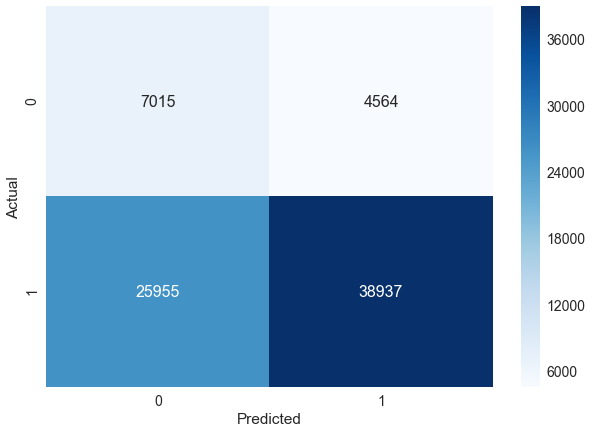

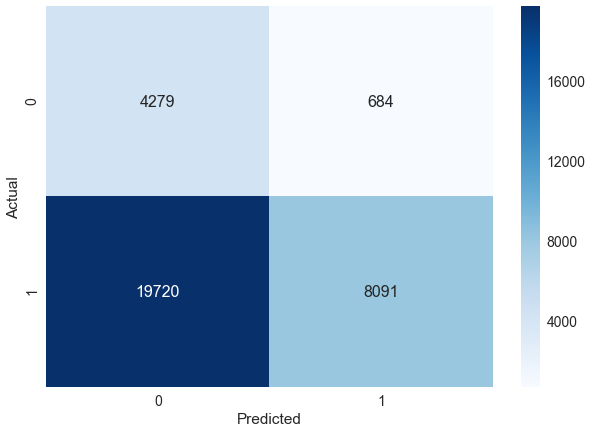

In [74]:
print("="*100)
import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [75]:
X_train_final_set_two = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,text_tfidf_train,title_tfidf_train,X_train_price_standard,X_train_project_standard))
Xtrain2 = X_train_final_set_two.tocsr()
X_test_final_set_two = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,text_tfidf_test,title_tfidf_test,X_test_price_standard,X_test_project_standard))
Xtest2 = X_test_final_set_two.tocsr()

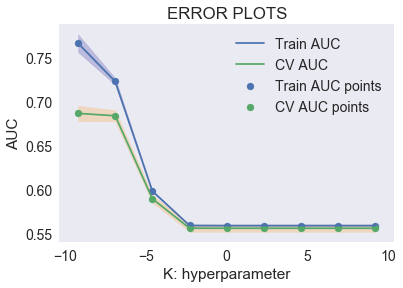

In [76]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain2, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

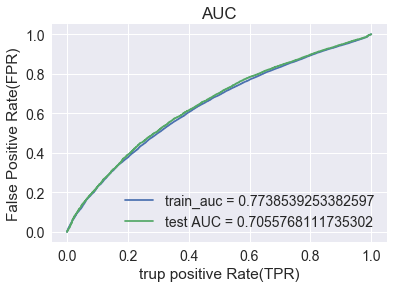

In [78]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',alpha = 10**-4,class_weight = 'balanced')
neigh.fit(Xtrain2,Y_train)

y_train_pred = neigh.decision_function(Xtrain2)
y_test_pred = neigh.decision_function(Xtest2)

train_fpr2,train_tpr2, tr_thresholds2 = roc_curve(Y_train,y_train_pred)
test_fpr2, test_tpr2, tr_thresholds2 = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr2,train_tpr2)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr2,test_tpr2)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

In [79]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5025311569256445 for threshold -1.029
[[ 3074  8505]
 [ 3280 61612]]
the maximum value of tpr*(1-fpr) 0.5025311569256445 for threshold -1.029
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4292388898082407 for threshold 0.105
[[ 3292  1671]
 [ 9814 17997]]
the maximum value of tpr*(1-fpr) 0.4292388898082407 for threshold 0.105


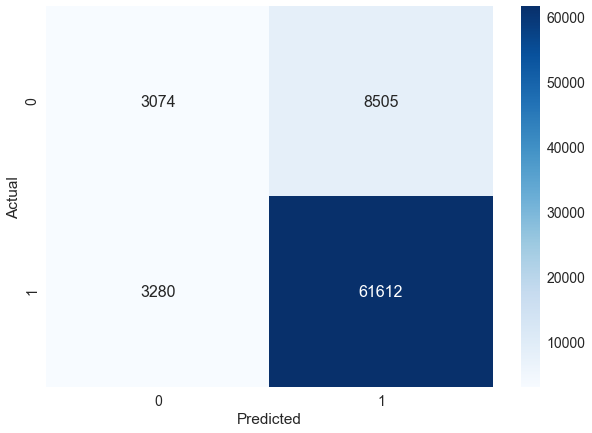

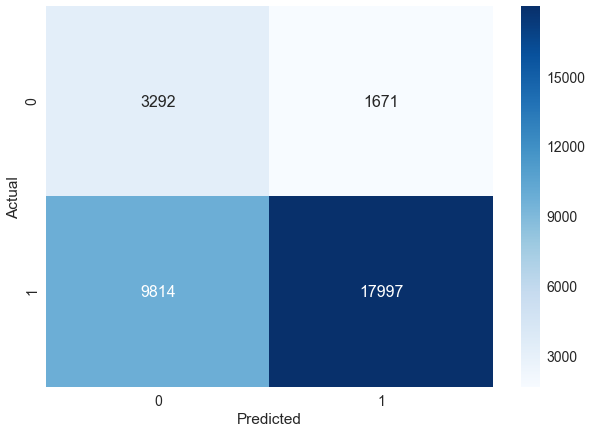

In [80]:
print("="*100)
import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds2, train_fpr2, train_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds2, test_fpr2, test_tpr2)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds2, test_fpr2, test_tpr2))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

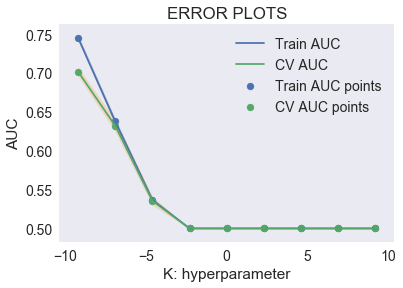

In [81]:
parameters: {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
logs = []

for i in parameters['alpha']:
    b=math.log(i)
    logs.append(b)
    
neigh = SGDClassifier(loss ='hinge',penalty = 'l1',class_weight = 'balanced')
clf = GridSearchCV(neigh,parameters,cv= 5,scoring = 'roc_auc')

clf.fit(Xtrain2,Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

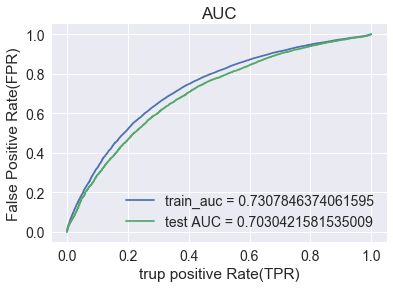

In [83]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',alpha = 10**-4,class_weight='balanced')
neigh.fit(Xtrain2,Y_train)

y_train_pred = neigh.decision_function(Xtrain2)
y_test_pred = neigh.decision_function(Xtest2)

train_fpr,train_tpr, tr_thresholds = roc_curve(Y_train,y_train_pred)
test_fpr, test_tpr, tr_thresholds = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4586356222098538 for threshold -1.383
[[ 1966  9613]
 [ 2858 62034]]
the maximum value of tpr*(1-fpr) 0.4586356222098538 for threshold -1.383
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4291699462723662 for threshold -0.058
[[ 3288  1675]
 [ 9795 18016]]
the maximum value of tpr*(1-fpr) 0.4291699462723662 for threshold -0.058


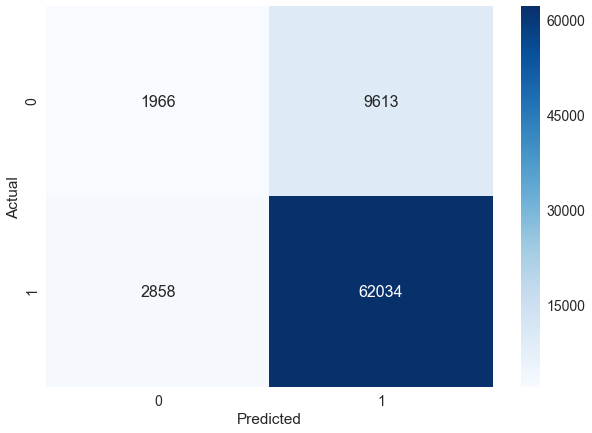

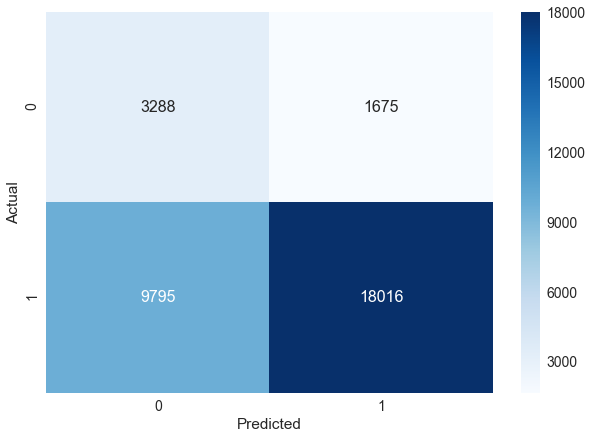

In [84]:
print("="*100)
import seaborn as sn
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [85]:
X_train_final_set_three = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,avg_w2v_vectors_train,avg_w2v_proj_train,X_train_price_standard,X_train_project_standard))
Xtrain3 = X_train_final_set_three.tocsr()
X_test_final_set_three = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,avg_w2v_vectors_test,avg_w2v_proj_test,X_test_price_standard,X_test_project_standard))
Xtest3 = X_test_final_set_three.tocsr()

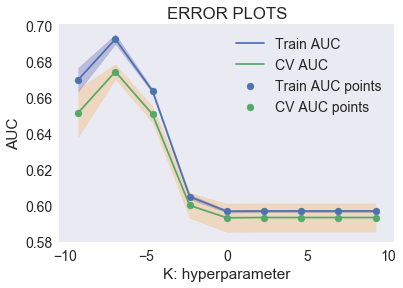

In [86]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain3, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

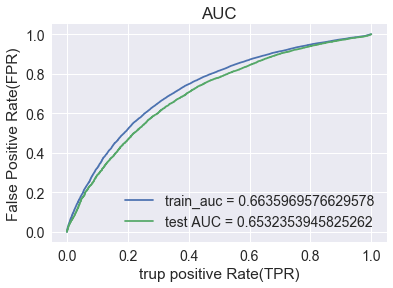

In [106]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',alpha = 10**-4,class_weight= 'balanced')
neigh.fit(Xtrain3,Y_train)

y_train_pred = neigh.decision_function(Xtrain3)
y_test_pred = neigh.decision_function(Xtest3)

train_fpr3,train_tpr3, tr_thresholds3 = roc_curve(Y_train,y_train_pred)
test_fpr3, test_tpr3, tr_thresholds3 = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr3,train_tpr3)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr3,test_tpr3)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

In [107]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38506616562108653 for threshold -2.964
[[  745 10834]
 [ 1145 63747]]
the maximum value of tpr*(1-fpr) 0.38506616562108653 for threshold -2.964
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3791255318119682 for threshold 0.41
[[ 3047  1916]
 [10637 17174]]
the maximum value of tpr*(1-fpr) 0.3791255318119682 for threshold 0.41


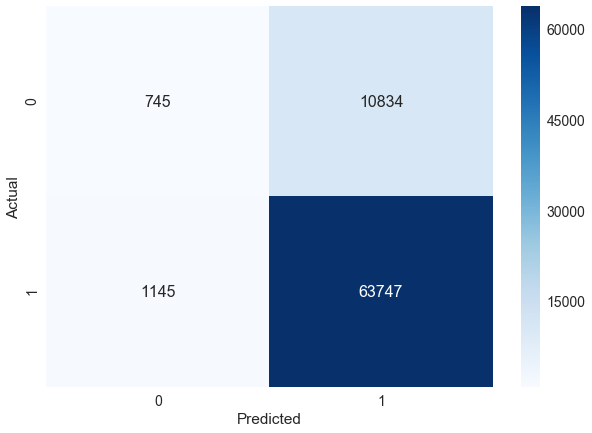

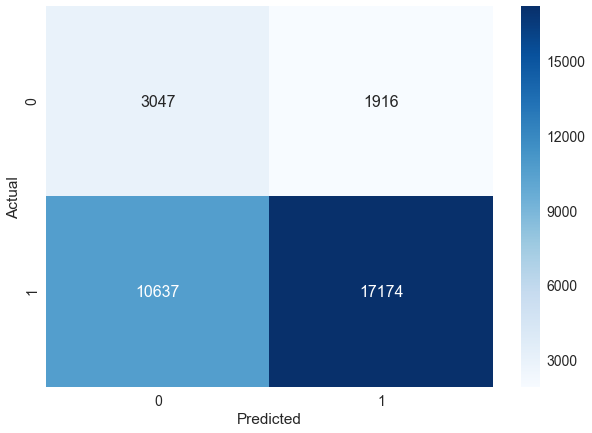

In [108]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds3, train_fpr3, train_tpr3)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds3, train_fpr3, train_tpr3))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds3, test_fpr3, test_tpr3)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds3, test_fpr3, test_tpr3))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

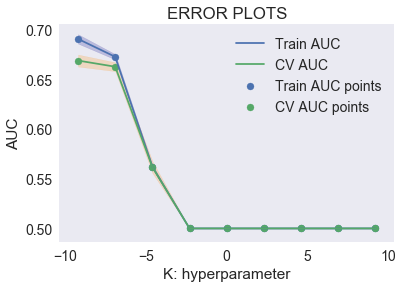

In [109]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',n_jobs=-1,class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain3, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

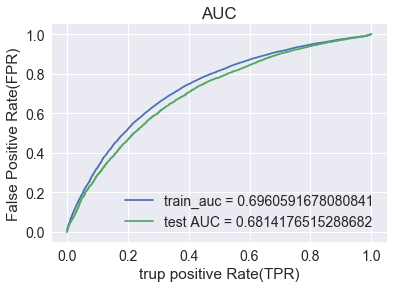

In [110]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',alpha = 10**-4,class_weight='balanced')
neigh.fit(Xtrain3,Y_train)

y_train_pred = neigh.decision_function(Xtrain3)
y_test_pred = neigh.decision_function(Xtest3)

train_fpr3,train_tpr3, tr_thresholds3 = roc_curve(Y_train,y_train_pred)
test_fpr3, test_tpr3, tr_thresholds3 = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr3,train_tpr3)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr3,test_tpr3)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4164573042518627 for threshold -3.333
[[  864 10715]
 [ 1085 63807]]
the maximum value of tpr*(1-fpr) 0.4164573042518627 for threshold -3.333
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.40472776747202965 for threshold -0.496
[[ 3128  1835]
 [ 9952 17859]]
the maximum value of tpr*(1-fpr) 0.40472776747202965 for threshold -0.496


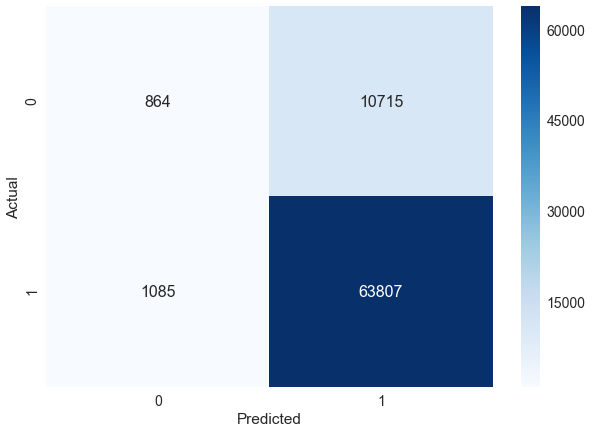

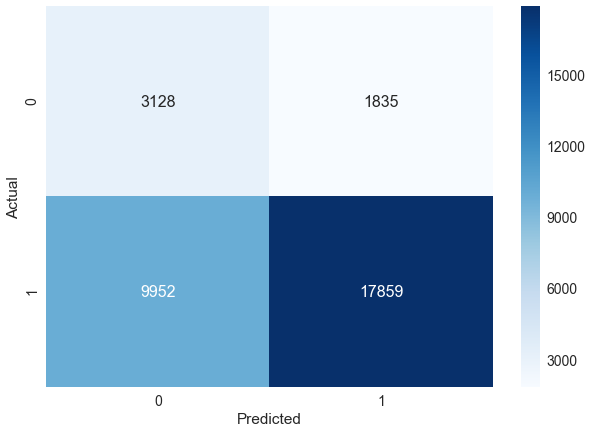

In [111]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds3, train_fpr3, train_tpr3)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds3, train_fpr3, train_tpr3))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds3, test_fpr3, test_tpr3)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds3, test_fpr3, test_tpr3))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')

<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [112]:
X_train_final_set_four = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,tfidf_w2v_vectors_train,tfidf_w2v_proj_train,X_train_price_standard,X_train_project_standard))
Xtrain4 = X_train_final_set_four.tocsr()
X_test_final_set_four = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,tfidf_w2v_vectors_test,tfidf_w2v_proj_test,X_test_price_standard,X_test_project_standard))
Xtest4 = X_test_final_set_four.tocsr()

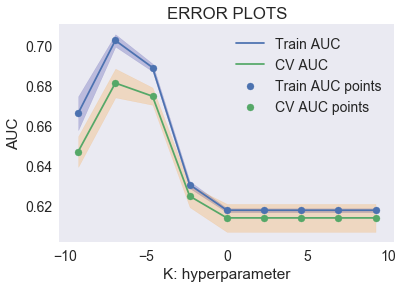

In [113]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain4, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

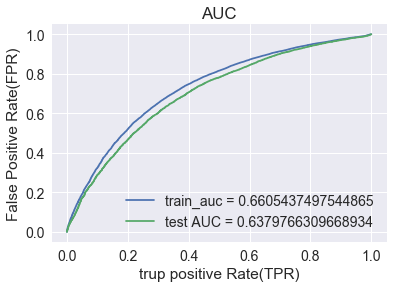

In [114]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',alpha = 10**-4,class_weight='balanced')
neigh.fit(Xtrain4,Y_train)

y_train_pred = neigh.decision_function(Xtrain4)
y_test_pred = neigh.decision_function(Xtest4)

train_fpr4,train_tpr4, tr_thresholds4 = roc_curve(Y_train,y_train_pred)
test_fpr4, test_tpr4, tr_thresholds4 = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr4,train_tpr4)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr4,test_tpr4)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3802982629659574 for threshold -5.418
[[  663 10916]
 [ 1132 63760]]
the maximum value of tpr*(1-fpr) 0.3802982629659574 for threshold -5.418
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.35838987226123414 for threshold -1.735
[[ 3022  1941]
 [11442 16369]]
the maximum value of tpr*(1-fpr) 0.35838987226123414 for threshold -1.735


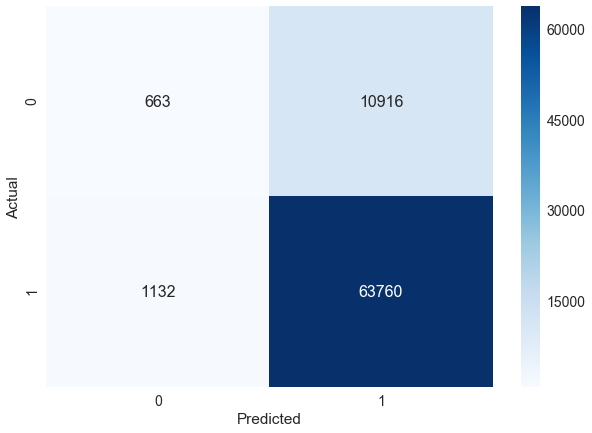

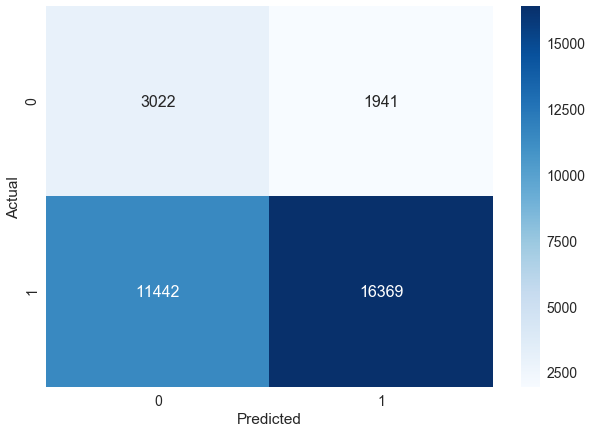

In [115]:


print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds4, train_fpr4, train_tpr4)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds4, train_fpr4, train_tpr4))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds4, test_fpr4, test_tpr4)))

data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds4, test_fpr4, test_tpr4))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



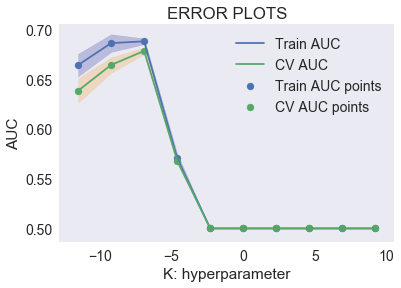

In [116]:
logs = []
parameters = {'alpha':[10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrain4, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

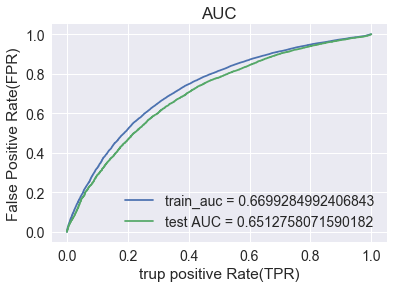

In [117]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',alpha = 10**-5,class_weight='balanced')
neigh.fit(Xtrain4,Y_train)

y_train_pred = neigh.decision_function(Xtrain4)
y_test_pred = neigh.decision_function(Xtest4)

train_fpr4,train_tpr4, tr_thresholds4 = roc_curve(Y_train,y_train_pred)
test_fpr4, test_tpr4, tr_thresholds4 = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fpr4,train_tpr4)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fpr4,test_tpr4)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38636830725651894 for threshold -22.76
[[  767 10812]
 [ 1246 63646]]
the maximum value of tpr*(1-fpr) 0.38636830725651894 for threshold -22.76
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3766672412202824 for threshold -3.684
[[ 3110  1853]
 [11094 16717]]
the maximum value of tpr*(1-fpr) 0.3766672412202824 for threshold -3.684


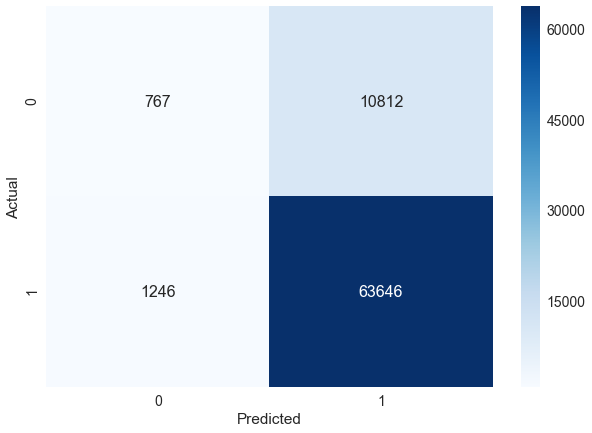

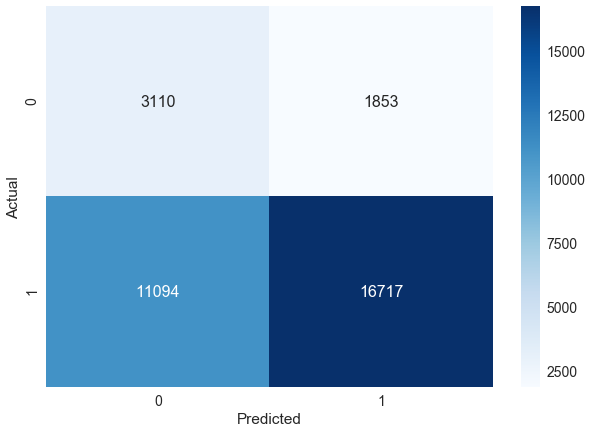

In [118]:


print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds4, train_fpr4, train_tpr4)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds4, train_fpr4, train_tpr4))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds4, test_fpr4, test_tpr4)))
data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholds4, test_fpr4, test_tpr4))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [119]:
text_tfidf_train.shape

(76471, 5000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [06:23<00:00, 88.04s/it]


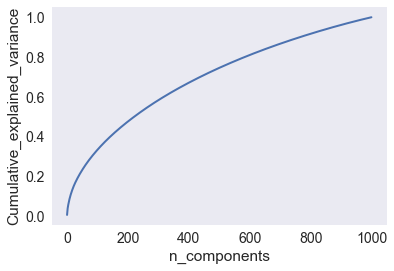

In [120]:
from sklearn.decomposition import TruncatedSVD
n = [50,100,200,400,500,1000]

for i in tqdm(n):
    svd = TruncatedSVD(n_components = i,n_iter=5, random_state=42)
    svd.fit_transform(text_tfidf_train)
    percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_)
    cum_var_explained = np.cumsum(percentage_var_explained)
    
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()



In [121]:
#From the plot above, we have retained about 90% of the variance at 800 points. Hence we will choose n_vomponents = 800
svd = TruncatedSVD(n_components = 800, n_iter = 5, random_state = 42)
svd.fit(text_tfidf_train)
trunc_train = svd.transform(text_tfidf_train)
trunc_test = svd.transform(text_tfidf_test)

print(trunc_train.shape)
print(trunc_test.shape)

(76471, 800)
(32774, 800)


In [122]:
X_train_final_set_best = hstack((categories_one_hot_train,sub_categories_one_hot_train,school_state_one_hot_train,teacher_prefix_one_hot_train,grade_cat_one_hot_train,X_train_price_standard,X_train_project_standard,X_train_quantity,X_train_word_essay,X_train_word_title,X_train_pos,X_train_neg,X_train_neu,X_train_com,trunc_train))
Xtrainb = X_train_final_set_best.tocsr()
X_test_final_set_best = hstack((categories_one_hot_test,sub_categories_one_hot_test,school_state_one_hot_test,teacher_prefix_one_hot_test,grade_cat_one_hot_test,X_test_price_standard,X_test_project_standard,X_test_quantity,X_test_word_essay,X_test_word_title,X_test_pos,X_test_neg,X_test_neu,X_test_com,trunc_test))
Xtestb = X_test_final_set_best.tocsr()

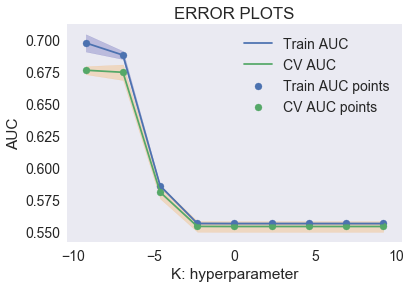

In [123]:
logs = []
parameters = {'alpha':[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',class_weight='balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrainb, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

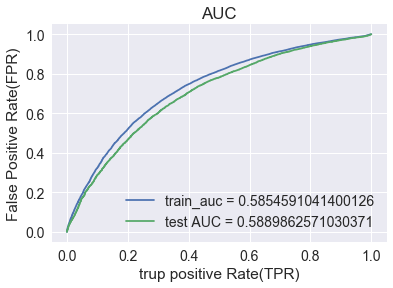

In [124]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l2',alpha = 10**-2,class_weight='balanced')
neigh.fit(Xtrainb,Y_train)

y_train_pred = neigh.decision_function(Xtrainb)
y_test_pred = neigh.decision_function(Xtestb)

train_fprb,train_tprb, tr_thresholdsb = roc_curve(Y_train,y_train_pred)
test_fprb, test_tprb, tr_thresholdsb = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fprb,train_tprb)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fprb,test_tprb)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3077637612280269 for threshold -1.029
[[  335 11244]
 [  724 64168]]
the maximum value of tpr*(1-fpr) 0.3077637612280269 for threshold -1.029
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3098816612027562 for threshold -0.084
[[ 2797  2166]
 [12519 15292]]
the maximum value of tpr*(1-fpr) 0.3098816612027562 for threshold -0.084


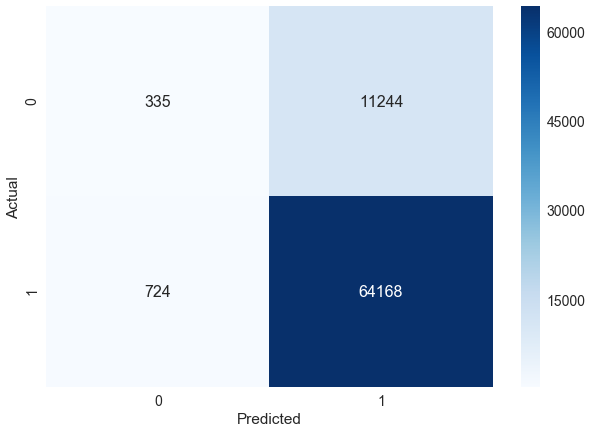

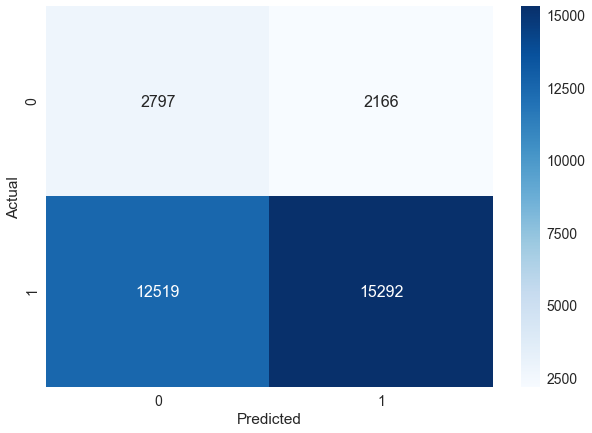

In [125]:


print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholdsb, train_fprb, train_tprb)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholdsb, train_fprb, train_tprb))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholdsb, test_fprb, test_tprb)))
data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholdsb, test_fprb, test_tprb))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



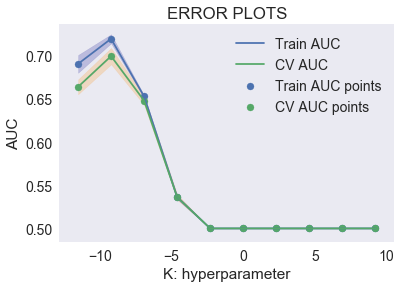

In [126]:
logs = []
parameters = {'alpha':[10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]}
for i in parameters['alpha']:
    b = math.log(i)
    logs.append(b)

neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',class_weight = 'balanced')



clf = GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(Xtrainb, Y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(logs, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(logs, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(logs,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(logs, train_auc, label='Train AUC points')
plt.scatter(logs, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

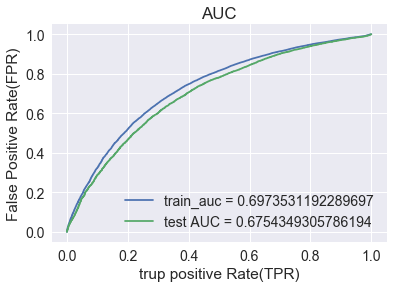

In [127]:
neigh = SGDClassifier(loss = 'hinge',penalty = 'l1',alpha = 10**-5,class_weight = 'balanced')
neigh.fit(Xtrainb,Y_train)

y_train_pred = neigh.decision_function(Xtrainb)
y_test_pred = neigh.decision_function(Xtestb)

train_fprb,train_tprb, tr_thresholdsb = roc_curve(Y_train,y_train_pred)
test_fprb, test_tprb, tr_thresholdsb = roc_curve(Y_test,y_test_pred)

plt.plot(train_fpr,train_tpr,label = "train_auc = "+str(auc(train_fprb,train_tprb)))
plt.plot(test_fpr,test_tpr,label = "test AUC = "+str(auc(test_fprb,test_tprb)))
plt.legend()
plt.xlabel("trup positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")

plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.4173356774790293 for threshold -4.082
[[  397 11182]
 [  461 64431]]
the maximum value of tpr*(1-fpr) 0.4173356774790293 for threshold -4.082
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.39317904418191724 for threshold -0.474
[[ 3164  1799]
 [10659 17152]]
the maximum value of tpr*(1-fpr) 0.39317904418191724 for threshold -0.474


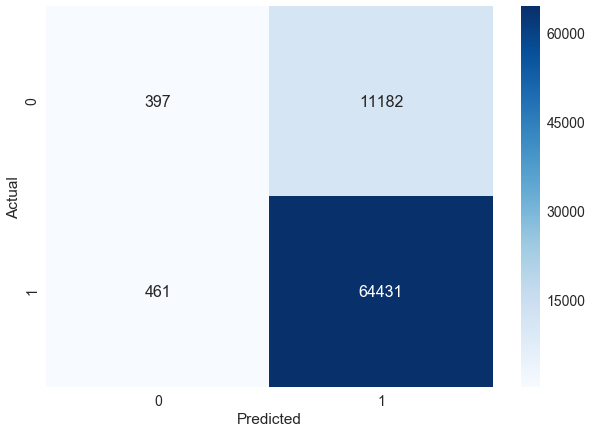

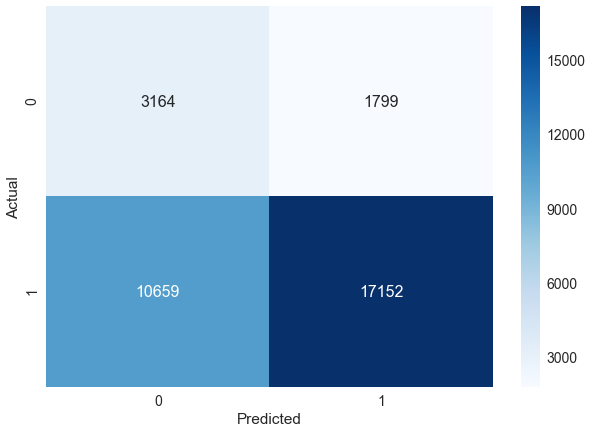

In [128]:


print("Train confusion matrix")
print(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholdsb, train_fprb, train_tprb)))
data = confusion_matrix(Y_train, predict(y_train_pred, tr_thresholdsb, train_fprb, train_tprb))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')


print("Test confusion matrix")
print(confusion_matrix(Y_test, predict(y_test_pred, tr_thresholdsb, test_fprb, test_tprb)))
data = confusion_matrix(Y_test, predict(y_test_pred, tr_thresholdsb, test_fprb, test_tprb))
df_cm = pd.DataFrame(data)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = 'd')



<h1>3. Conclusion</h1>

In [1]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Method", "penalty-2", "AUC - Test data","penalty-1", 'AUC-Test Data']

x.add_row(["BOW", 'l2', 0.6,'l1',0.64])
x.add_row(["TFIDF", 'l2', 0.7,'l1',0.7])
x.add_row(["W2V", 'l2', 0.65,'l1',0.68])
x.add_row(["W2V-TFIDF", 'l2', 0.63,'l1',0.65])
x.add_row(["SET - 5", 'l2',0.58,'l1',0.67])

print(x)

+-----------+-----------+-----------------+-----------+---------------+
|   Method  | penalty-2 | AUC - Test data | penalty-1 | AUC-Test Data |
+-----------+-----------+-----------------+-----------+---------------+
|    BOW    |     l2    |       0.6       |     l1    |      0.64     |
|   TFIDF   |     l2    |       0.7       |     l1    |      0.7      |
|    W2V    |     l2    |       0.65      |     l1    |      0.68     |
| W2V-TFIDF |     l2    |       0.63      |     l1    |      0.65     |
|  SET - 5  |     l2    |       0.58      |     l1    |      0.67     |
+-----------+-----------+-----------------+-----------+---------------+
